The names of the columns in the heart dataset are as follows:

1. `age`: It represents the age of the patient in years. It is a numerical variable.

2. `sex`: It denotes the gender of the patient. The value 1 represents male, and the value 0 represents female. It is a categorical variable.

3. `cp`: It stands for chest pain type and represents the type of chest pain experienced by the patient. The values are categorized as follows:
   - 0: Typical angina (chest pain related to reduced blood flow to the heart).
   - 1: Atypical angina (chest pain not clearly related to heart problems).
   - 2: Non-anginal pain (pain not originating from the heart).
   - 3: Asymptomatic (no chest pain). 
   It is a categorical variable.

4. `trtbps`: It refers to the resting blood pressure of the patient in mm Hg (millimeters of mercury). It is a numerical variable.

5. `chol`: It represents the serum cholesterol level of the patient in mg/dl (milligrams per deciliter). It is a numerical variable.

6. `fbs`: It stands for fasting blood sugar and indicates the fasting blood sugar level of the patient. If the level is higher than 120 mg/dl, it is represented by 1; otherwise, it is represented by 0. It is a categorical variable.

7. `restecg`: It denotes the resting electrocardiographic results, which provide information about the electrical activity of the heart at rest. The values are categorized as follows:
   - 0: Normal (normal ECG results).
   - 1: Having ST-T wave abnormality (abnormalities in the ST-T wave segment of the ECG).
   - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria (significant enlargement of the left ventricle of the heart).
   It is a categorical variable.

8. `thalachh`: It represents the maximum heart rate achieved by the patient during exercise. It is a numerical variable.

9. `exng`: It stands for exercise-induced angina and indicates whether the patient experienced angina (chest pain) during exercise. If angina was induced, it is represented by 1; otherwise, it is represented by 0. It is a categorical variable.

10. `oldpeak`: It refers to the ST depression induced by exercise relative to rest. It measures abnormalities in the electrocardiogram (ECG) waveform. It is a numerical variable.

11. `slp`: It denotes the slope of the peak exercise ST segment. The values are categorized as follows:
    - 0: Upsloping (positive slope).
    - 1: Flat (horizontal slope).
    - 2: Downsloping (negative slope).
    It is a categorical variable.

12. `caa`: It represents the number of major vessels colored by fluoroscopy. It indicates the presence of narrowing or blockages in the major blood vessels of the heart. The values range from 0 to 3. It is a numerical variable.

13. `thall`: It denotes the Thallium stress test result, which is a nuclear imaging test used to evaluate blood flow to the heart. The values are categorized as follows:
    - 0: Normal (no abnormality).
    - 1: Fixed defect (blood flow is significantly blocked in a specific area).
    - 2: Reversible defect (blood flow is partially blocked but can be improved with medication or other interventions).
    - 3: Unknown.
    It is a categorical variable.

14. `output`: It represents the presence of heart disease. If the patient has heart disease, it is represented by 1; otherwise, it is represented by 0. It is the target variable or the dependent variable used for classification tasks.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [100]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [102]:
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [103]:
df.duplicated().sum()

1

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.reset_index(drop=True,inplace=True)

In [106]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [107]:
for col in df.columns:
    print(col,':\n',df[col].value_counts(),sep='')
    print('*'*50)

age:
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
**************************************************
sex:
1    206
0     96
Name: sex, dtype: int64
**************************************************
cp:
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
**************************************************
trtbps:
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
2

In [108]:
edf = df.copy()


In [109]:
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [110]:
def plotUnivariateCategorical(df,column):
    """
    Generate a pie chart to visualize the distribution of a categorical variable in a DataFrame.

    Parameters:
    - column (str): The name of the categorical column in the DataFrame.

    Returns:
    - None: Displays an interactive pie chart using Plotly.
    
    The function creates a pie chart to visualize the distribution of the specified categorical column.
    It uses Plotly for interactive visualization and allows customization of chart properties.
    The chart displays the percentage and label information inside each pie slice.
    
    Example:
    univariateCategorical('category_column')
    """
    custom_palette = px.colors.qualitative.Plotly
    lab = column.replace('_', ' ').title()
    
    fig = px.pie(df, names=column, title=f'{lab} Distribution',
                 labels={column: lab},
                 color_discrete_sequence=custom_palette,
                 hole=0.3,
                 )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(
        legend=dict(title=column.replace('_', ' ').title()),
        margin=dict(l=0, r=0, b=0, t=50)
    )
    return fig


In [111]:
def plotUnivariateNumerical(column):
    """
    Generate a histogram to visualize the distribution of a numerical variable in a DataFrame.

    Parameters:
    - column (str): The name of the numerical column in the DataFrame.

    Returns:
    - None: Displays an interactive histogram using Plotly.
    
    The function creates a histogram to visualize the distribution of the specified numerical column.
    It uses Plotly for interactive visualization and allows customization of chart properties.
    The chart displays the distribution of values along the x-axis.
    
    Example:
    plotUnivariateNumerical('numerical_column')
    """
    lab = column.replace('_',' ').title()
    fig = px.histogram(df, x=column, title=f'{lab} Distribution', labels={column: lab},text_auto='.2f')
    return fig


In [112]:

num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Plotting the relationship between numerical columns and the output column
for col in num_cols:
    fig = go.Figure()
    fig.add_trace(go.Box(x=df['output'], y=df[col], name=col))
    fig.update_layout(title=f'Relationship between {col} and Output', xaxis_title='Output', yaxis_title=col)
    fig.show()


## Univariate Analysis

In [113]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [114]:
px.box(df,'age')

In [115]:
plotUnivariateNumerical('age')

In [116]:
edf['sex'] = edf['sex'].map({0:'Female',1:'Male'})

In [117]:
edf['sex'].value_counts()

Male      206
Female     96
Name: sex, dtype: int64

In [118]:
column = 'sex'
custom_palette = px.colors.qualitative.Plotly

fig = px.pie(edf, names=column,title=f'{column} Distribution',
                color_discrete_sequence=custom_palette,
                hole=0.3,
                )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    legend=dict(title=column.replace('_', ' ').title()),
    margin=dict(l=0, r=0, b=0, t=50)
)
fig.show()

In [119]:
# - 0: Typical angina (chest pain related to reduced blood flow to the heart).
# - 1: Atypical angina (chest pain not clearly related to heart problems).
# - 2: Non-anginal pain (pain not originating from the heart).
# - 3: Asymptomatic (no chest pain)
edf['cp'] = edf['cp'].map({0:'Typical angina',1:'Atypical angina',2:'Non-anginal pain',3:'Asymptomatic'})

In [120]:
edf['cp'].value_counts() 

Typical angina      143
Non-anginal pain     86
Atypical angina      50
Asymptomatic         23
Name: cp, dtype: int64

In [121]:
plotUnivariateCategorical(edf,'cp')

In [122]:
df['trtbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trtbps, dtype: int64

In [123]:
px.box(df,'trtbps')

In [124]:
plotUnivariateNumerical('trtbps')

In [125]:
df['chol'].value_counts()

204    6
197    6
234    6
212    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [126]:
px.box(df,'chol')

In [127]:
plotUnivariateNumerical('chol')

In [128]:
# It stands for fasting blood sugar and indicates the fasting blood sugar level of the patient.
# If the level is higher than 120 mg/dl, it is represented by 1;
# otherwise, it is represented by 0. It is a categorical variable.
edf['fbs'] = edf['fbs'].map({0:'less',1:'higher than 120 mg/dl'})

In [129]:
edf['fbs'].value_counts()

less                     257
higher than 120 mg/dl     45
Name: fbs, dtype: int64

In [130]:
plotUnivariateCategorical(edf,'fbs')

In [131]:
# `restecg`: It denotes the resting electrocardiographic results, 
# which provide information about the electrical activity of the heart at rest.
# The values are categorized as follows:
# - 0: Normal (normal ECG results).
# - 1: Having ST-T wave abnormality (abnormalities in the ST-T wave segment of the ECG).
#- 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria (significant enlargement of the left ventricle of the heart).
#   It is a categorical variable.
edf['restecg'] = edf['restecg'].map({0: 'Normal ECG',1: 'ST-T wave abnormality',2: 'Probable or definite left ventricular hypertrophy'})

In [132]:
edf['restecg'].value_counts()

ST-T wave abnormality                                151
Normal ECG                                           147
Probable or definite left ventricular hypertrophy      4
Name: restecg, dtype: int64

In [133]:
plotUnivariateCategorical(edf,'restecg')

In [134]:
df['thalachh'].value_counts()

162    11
160     9
163     9
152     8
125     7
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalachh, Length: 91, dtype: int64

In [135]:
px.box(df,'thalachh')

In [136]:
plotUnivariateNumerical('thalachh')

In [137]:
edf['exng']= edf['exng'].map({0: 'No exercise-induced angina',
    1: 'Exercise-induced angina (chest pain)'})

In [138]:
edf['exng'].value_counts()

No exercise-induced angina              203
Exercise-induced angina (chest pain)     99
Name: exng, dtype: int64

In [139]:
plotUnivariateCategorical(edf,'exng')

In [140]:
df['oldpeak'].value_counts()

0.0    98
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [141]:
px.box(df,'oldpeak')

In [142]:
plotUnivariateNumerical('oldpeak')

In [143]:
edf['slp'] = edf['slp'].map( {
    0: 'Upsloping (positive slope)',
    1: 'Flat (horizontal slope)',
    2: 'Downsloping (negative slope)'
}
)

In [144]:
edf['slp'].value_counts()

Downsloping (negative slope)    141
Flat (horizontal slope)         140
Upsloping (positive slope)       21
Name: slp, dtype: int64

In [145]:
plotUnivariateCategorical(edf,'slp')

In [146]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

In [147]:
edf['caa'] = edf['caa'].map({
    0: 'No major vessels colored',
    1: 'One major vessel colored',
    2: 'Two major vessels colored',
    3: 'Three major vessels colored',
    4: 'Four major vessels colored'
})

In [148]:
edf['caa'].value_counts()

No major vessels colored       175
One major vessel colored        65
Two major vessels colored       38
Three major vessels colored     20
Four major vessels colored       4
Name: caa, dtype: int64

In [149]:
df['caa']

0      0
1      0
2      0
3      0
4      0
      ..
297    0
298    0
299    2
300    1
301    1
Name: caa, Length: 302, dtype: int64

In [150]:
plotUnivariateCategorical(edf,'caa')

In [151]:
thall_mapping = {
    0: 'Normal (no abnormality)',
    1: 'Fixed defect (significant blockage in a specific area)',
    2: 'Reversible defect (partial blockage, can be improved)',
    3: 'Unknown'
}
edf['thall'] = edf['thall'].map(thall_mapping)

In [152]:
edf['thall'].value_counts()

Reversible defect (partial blockage, can be improved)     165
Unknown                                                   117
Fixed defect (significant blockage in a specific area)     18
Normal (no abnormality)                                     2
Name: thall, dtype: int64

In [153]:
px.histogram(df,'thall',text_auto='.2f')

In [154]:
edf['output'] = edf['output'].map({  
    0: 'No heart disease',
    1: 'Heart disease present'
})

In [155]:
edf['output'].value_counts()

Heart disease present    164
No heart disease         138
Name: output, dtype: int64

In [156]:
plotUnivariateCategorical(edf,'output')

## Bivariate Analysis

In [157]:
df[num_cols+['output']].corr()

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.221476
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,-0.429146
output,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,1.000000


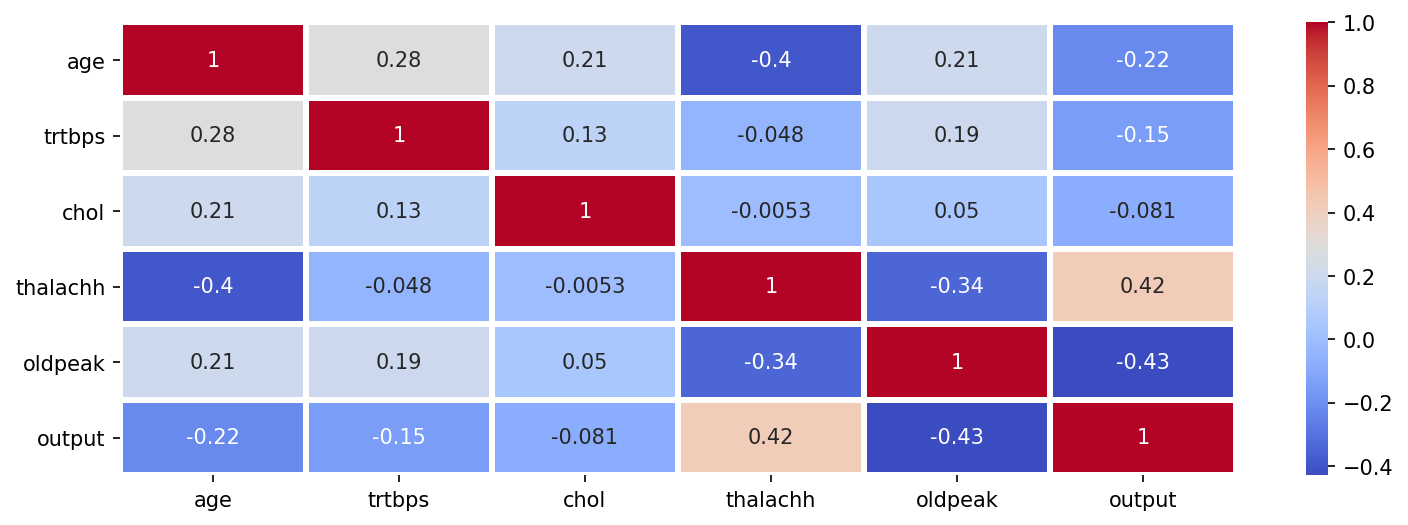

In [158]:
fig = plt.figure(figsize=(12,4),dpi=150)
ax = sns.heatmap(df[num_cols+['output']].corr(),cmap='coolwarm',linewidths=2,annot=True)
plt.show()

In [159]:
df.groupby('age')[['output']].sum().reset_index()

,age,output
0,29,1
1,34,2
2,35,2
3,37,2
4,38,1
5,39,3
6,40,1
7,41,9
8,42,7
9,43,5


In [160]:
px.histogram(df,'age','output',text_auto='.2f')

In [161]:
def multivariateAnalysis(x, y, z):
    """
    Generate a grouped histogram for multivariate analysis.

    Parameters:
    - x (str): The variable for the x-axis. Should be a column name in the DataFrame.
    - y (str): The variable for the y-axis. Should be a column name in the DataFrame.
    - z (str): The grouping variable for color. Should be a column name in the DataFrame.

    Returns:
    - fig: Plotly Figure object.

    Description:
    This function takes three variables and generates a grouped histogram for multivariate analysis.
    It uses the Plotly library to create a histogram with the specified x, y, and z variables.
    The function replaces underscores with spaces and title-cases the labels for better readability.
    The resulting plot is displayed using Plotly's `show` method.

    Example:
    >>> multivariateAnalysis('age', 'income', 'gender')
    # Generates a grouped histogram of 'age' vs 'income' colored by 'gender'.

    Note:
    Ensure that the 'df' DataFrame is defined before calling this function.
    """
    x_lab = x.replace('_', ' ').title()
    y_lab = y.replace('_', ' ').title()
    z_lab = z.replace('_', ' ').title()
    
    fig = px.histogram(df, x=x, color=z, barmode='group',text_auto='.2f',
                       labels={z: z_lab, y: y_lab, x: x_lab},
                       title=f'{x_lab} vs {y_lab} by {z_lab}', y=y, histfunc='avg')
    return fig

In [162]:
px.histogram(edf,'sex',color='output',barmode='group',text_auto='.2f')

In [163]:
px.histogram(edf,'cp',color='output',barmode='group',text_auto='.2f')

In [164]:
px.histogram(df,'trtbps','output',text_auto='.2f')

In [165]:
px.histogram(df,'chol','output',text_auto='.2f')

In [166]:
px.histogram(edf,'fbs',color='output',text_auto='.2f',barmode='group')

In [167]:
px.histogram(edf,'restecg',color='output',barmode='group',text_auto='.2f')

In [168]:
px.histogram(df,'thalachh','output',text_auto='.2f')

In [169]:
px.histogram(edf,'exng',color='output',barmode='group',text_auto='.2f')

In [170]:
px.histogram(edf,'oldpeak',color='output',barmode='group',text_auto='.2f')

In [171]:
px.histogram(edf,'slp',color='output',barmode='group',text_auto='.2f')

In [172]:
px.histogram(edf,'caa',color='output',barmode='group',text_auto='.2f')

In [173]:
px.histogram(edf,'thall',color='output',barmode='group',text_auto='.2f')

In [174]:
fig = px.scatter_matrix(df)
fig.update_layout(
    autosize=False,
    width=1000,  
    height=1000,  
)
fig.show()

In [175]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Question 1: Probability of heart disease given age and gender

In [176]:
age = 50
gender = 0
total_individuals = df.shape[0]
heart_disease_count = (df[(df['age'] == age) & (df['sex'] == gender) & (df['output'] == 1)]).shape[0]
probability = heart_disease_count / total_individuals
print(f"The probability of an individual (age {age}, gender {gender}) having heart disease is: {probability:.2f}")

The probability of an individual (age 50, gender 0) having heart disease is: 0.01


### Question 2: Independence between chest pain type and blood pressure

In [177]:
contingency_table = pd.crosstab(df['cp'], df['trtbps'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between chest pain type and blood pressure.")
else:
    print("There is no significant association between chest pain type and blood pressure.")

There is no significant association between chest pain type and blood pressure.


###  Question 3: Expected value of cholesterol levels in individuals with heart disease


In [178]:
expected_cholesterol = df[df['output'] == 1]['chol'].mean()
print(f"The expected value of cholesterol levels in individuals with heart disease is: {expected_cholesterol:.2f}")

The expected value of cholesterol levels in individuals with heart disease is: 242.64


### Question 4: Correlation between fasting blood sugar levels and presence of heart disease

In [179]:
correlation, p_value = stats.spearmanr(df['fbs'], df['output'])
if p_value < alpha:
    print("There is a significant correlation between fasting blood sugar levels and the presence of heart disease.")
else:
    print("There is no significant correlation between fasting blood sugar levels and the presence of heart disease.")

There is no significant correlation between fasting blood sugar levels and the presence of heart disease.


### Question 5: Confidence interval for the mean age of individuals with heart disease
 

In [180]:
confidence_interval = stats.t.interval(0.95, len(df[df['output'] == 1])-1, loc=df[df['output'] == 1]['age'].mean(), scale=stats.sem(df[df['output'] == 1]['age']))
print(f"The confidence interval for the mean age of individuals with heart disease is: {confidence_interval}")

The confidence interval for the mean age of individuals with heart disease is: (51.1186955015283, 54.052036205788774)


###  Question 6: Difference in cholesterol levels between different types of chest pain


In [181]:
chest_pain_types = df['cp'].unique()
groups = [df[df['cp'] == cp]['chol'] for cp in chest_pain_types]
f_statistic, p_value = stats.f_oneway(*groups)
if p_value < alpha:
    print("There is a significant difference in cholesterol levels between individuals with different types of chest pain.")
else:
    print("There is no significant difference in cholesterol levels between individuals with different types of chest pain.")

There is no significant difference in cholesterol levels between individuals with different types of chest pain.


### Question 7: Linear relationship between age and maximum heart rate

In [182]:
age = df['age']
maximum_heart_rate = df['thalachh']
slope, intercept, r_value, p_value, _ = stats.linregress(age, maximum_heart_rate)
if p_value < alpha:
    print("There is a linear relationship between the age of an individual and their maximum heart rate.")
else:
    print("There is no significant linear relationship between the age of an individual and their maximum heart rate.")

There is a linear relationship between the age of an individual and their maximum heart rate.


### Question 8: Logistic regression to predict the presence of heart disease

In [183]:
X = df[['age', 'sex', 'cp']]
y = df['output']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.514158
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  302
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.2542
Time:                        18:21:19   Log-Likelihood:                -155.28
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 8.499e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4020      1.015      4.338      0.000       2.413       6.391
age           -0.0723      0.

e:\EpsilonAI\programs\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



### Question 9: Goodness-of-fit measures for the simple linear regression model

In [184]:
r_squared = r_value ** 2
print(f"The R-squared value for the simple linear regression model is: {r_squared:.2f}")

The R-squared value for the simple linear regression model is: 0.16


### Question 10: Interpretation of R-squared value for heart disease prediction

In [185]:
print("The R-squared value indicates the proportion of variance in heart disease occurrence that is explained by age.")
print("A higher R-squared value suggests that age is a better predictor of heart disease.")

The R-squared value indicates the proportion of variance in heart disease occurrence that is explained by age.
A higher R-squared value suggests that age is a better predictor of heart disease.


### Model

In [186]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [187]:
X = df.drop('output', axis= 1)
y = df.output

In [188]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [189]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [190]:
y_predict = rf.predict(x_test)
rf.score(x_test, y_test) # test_accuracy

0.8688524590163934

In [191]:
rf.score(x_train, y_train) # train_accuracy

1.0

In [192]:
accuracy_score(y_test, y_predict) # test_accuracy

0.8688524590163934

In [193]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
accuracy_score(y_test, y_predict) # test_accuracy better by changing hyper-parameters

0.8688524590163934

In [194]:
edf.to_csv('edaHeartAttack.csv',index=False)

In [195]:
actual = y_test
# Calculate performance measures
accuracy = accuracy_score(actual, y_predict) * 100
precision = precision_score(actual, y_predict) * 100
recall = recall_score(actual, y_predict) * 100
f1 = f1_score(actual, y_predict) * 100



# Print the numerical results
print("Numerical Results:\n")
print("1. Performance Measures:")
print(f"   - Accuracy: {accuracy}%")
print(f"   - Precision: {precision}%")
print(f"   - Recall: {recall}%")
print(f"   - F1 Score: {f1}%\n")


Numerical Results:

1. Performance Measures:
   - Accuracy: 86.88524590163934%
   - Precision: 90.0%
   - Recall: 84.375%
   - F1 Score: 87.0967741935484%



Summary Statistics for Numerical Features:
             age      trtbps        chol    thalachh     oldpeak
count  302.00000  302.000000  302.000000  302.000000  302.000000
mean    54.42053  131.602649  246.500000  149.569536    1.043046
std      9.04797   17.563394   51.753489   22.903527    1.161452
min     29.00000   94.000000  126.000000   71.000000    0.000000
25%     48.00000  120.000000  211.000000  133.250000    0.000000
50%     55.50000  130.000000  240.500000  152.500000    0.800000
75%     61.00000  140.000000  274.750000  166.000000    1.600000
max     77.00000  200.000000  564.000000  202.000000    6.200000

Statistical Test for age:
  t-statistic: 3.93
  p-value: 0.0001

Statistical Test for trtbps:
  t-statistic: 2.56
  p-value: 0.0109

Statistical Test for chol:
  t-statistic: 1.42
  p-value: 0.1580

Statistical Test for thalachh:
  t-statistic: -8.01
  p-value: 0.0000

Statistical Test for oldpeak:
  t-statistic: 8.23
  p-value: 0.0000

Frequency Counts for sex:
1    2

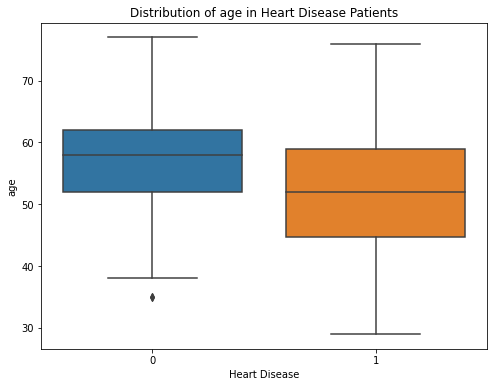

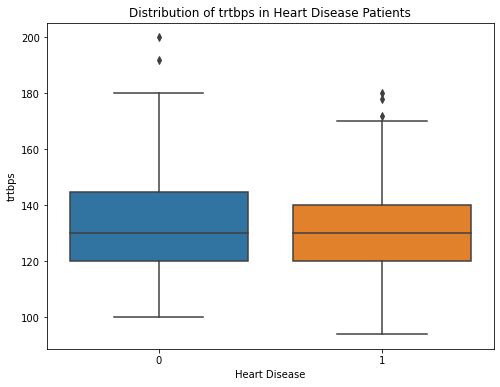

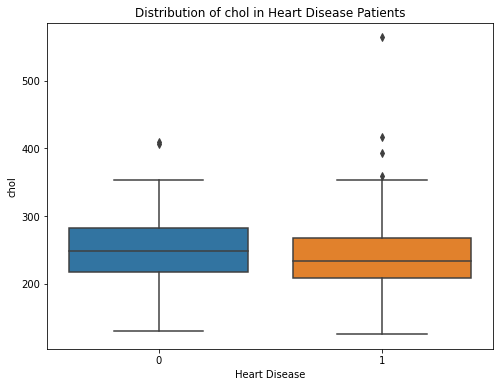

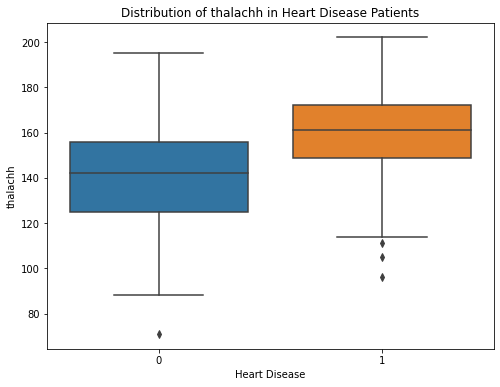

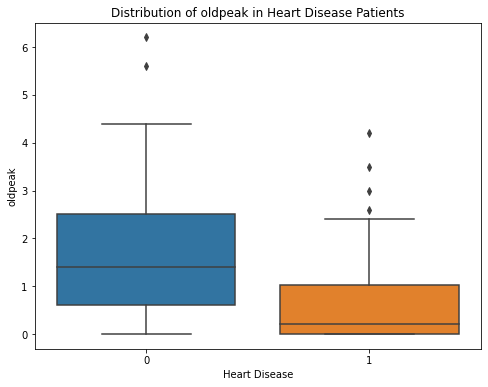

In [196]:
from scipy import stats
num_df = df[num_cols]

# Calculate summary statistics for numerical features
summary_stats = num_df.describe()
print("Summary Statistics for Numerical Features:")
print(summary_stats)

# Perform statistical tests on numerical features
for col in num_cols:
    if col != 'output':  # Adjust if 'output' is not a numerical feature
        t_statistic, p_value = stats.ttest_ind(df[df['output'] == 0][col], df[df['output'] == 1][col])
        print(f"\nStatistical Test for {col}:")
        print(f"  t-statistic: {t_statistic:.2f}")
        print(f"  p-value: {p_value:.4f}")

# Analyze categorical features
for col in cat_cols:
    print(f"\nFrequency Counts for {col}:")
    print(df[col].value_counts())

    # Create contingency table for categorical features
    contingency_table = pd.crosstab(df[col], df['output'])
    print(f"\nContingency Table for {col} vs. output:")
    print(contingency_table)

    # Perform chi-square test for categorical features
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"\nChi-square Test for {col}:")
    print(f"  Chi-square statistic: {chi2_stat:.2f}")
    print(f"  p-value: {p_value:.4f}")

# Visualize numerical features
for col in num_cols:
    if col != 'output':  # Adjust if 'output' is not a numerical feature
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='output', y=col, data=df)
        plt.xlabel('Heart Disease')
        plt.ylabel(col)
        plt.title(f'Distribution of {col} in Heart Disease Patients')
        plt.show()